In [8]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship",
          "Truck"]

In [4]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [5]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

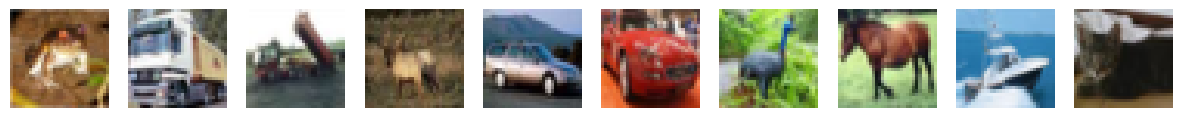

In [9]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i in range(10):
    axs[i].imshow(x_train[i])
    axs[i].axis("off")
plt.show()

In [10]:
[labels[i] for i in y_train[:10].flatten()]

['Frog',
 'Truck',
 'Truck',
 'Deer',
 'Automobile',
 'Automobile',
 'Bird',
 'Horse',
 'Ship',
 'Cat']

In [11]:
scaled_train = x_train / 255
scaled_test = x_test / 255

In [12]:
scaled_sub, scaled_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                                        stratify = y_train, random_state = 12)

In [13]:
scaled_sub.shape, scaled_val.shape, scaled_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

# 모델 구성

## MSE 맛집 레시피

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same",
                              input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [17]:
history = model.fit(scaled_sub, y_sub, epochs = 30, validation_data = (scaled_val, y_val),
                    callbacks = [early_stopping_cb])

Epoch 1/30


1250/1250 [==============================] - 63s 49ms/step - loss: 2.1805 - accuracy: 0.1753 - val_loss: 1.9798 - val_accuracy: 0.2674
Epoch 2/30
1250/1250 [==============================] - 67s 54ms/step - loss: 1.9106 - accuracy: 0.3040 - val_loss: 1.7355 - val_accuracy: 0.3674
Epoch 3/30
1250/1250 [==============================] - 56s 45ms/step - loss: 1.7030 - accuracy: 0.3795 - val_loss: 1.5612 - val_accuracy: 0.4404
Epoch 4/30
1250/1250 [==============================] - 52s 41ms/step - loss: 1.5658 - accuracy: 0.4282 - val_loss: 1.4483 - val_accuracy: 0.4728
Epoch 5/30
1250/1250 [==============================] - 52s 41ms/step - loss: 1.4616 - accuracy: 0.4691 - val_loss: 1.3265 - val_accuracy: 0.5235
Epoch 6/30
1250/1250 [==============================] - 52s 41ms/step - loss: 1.3771 - accuracy: 0.5013 - val_loss: 1.2911 - val_accuracy: 0.5348
Epoch 7/30
1250/1250 [==============================] - 54s 43ms/step - loss: 1.3026 - accuracy: 0.5277 - val_loss: 1.2222

In [18]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.6926 - accuracy: 0.7647


[0.6925846338272095, 0.7646999955177307]

## 내 모델

In [19]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same",
                               input_shape = (32, 32, 3)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.2))

model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.25))

model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.35))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(256, activation = "relu"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(10, activation = "softmax"))

In [20]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = adam,
               metrics = "accuracy")

In [22]:
model1.fit(scaled_sub, y_sub, epochs = 100, validation_data = (scaled_val, y_val),
           callbacks = [early_stopping_cb], batch_size = 64)

Epoch 1/100
625/625 [==============================] - 204s 316ms/step - loss: 2.2835 - accuracy: 0.3138 - val_loss: 1.7638 - val_accuracy: 0.3815
Epoch 2/100
625/625 [==============================] - 197s 315ms/step - loss: 1.6872 - accuracy: 0.4380 - val_loss: 1.3009 - val_accuracy: 0.5455
Epoch 3/100
625/625 [==============================] - 163s 261ms/step - loss: 1.4226 - accuracy: 0.5149 - val_loss: 1.1231 - val_accuracy: 0.5966
Epoch 4/100
625/625 [==============================] - 166s 265ms/step - loss: 1.2559 - accuracy: 0.5654 - val_loss: 1.0198 - val_accuracy: 0.6318
Epoch 5/100
625/625 [==============================] - 166s 265ms/step - loss: 1.1157 - accuracy: 0.6122 - val_loss: 0.9732 - val_accuracy: 0.6594
Epoch 6/100
 32/625 [>.............................] - ETA: 2:55 - loss: 1.0365 - accuracy: 0.6396

KeyboardInterrupt: 

## ResNet50

In [23]:
base_model = keras.applications.ResNet50(weights = "imagenet", include_top = False,
                                         input_shape = (32, 32, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [24]:
base_model.layers

In [25]:
# resnet 출력층 구성
resnet = keras.Sequential()
resnet.add(base_model)
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(512, activation = "relu"))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Dropout(0.5))
resnet.add(keras.layers.Dense(10, activation = "softmax"))

In [26]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
resnet.compile(loss = "sparse_categorical_crossentropy", optimizer = adam,
               metrics = ["accuracy"])

In [27]:
resnet.fit(scaled_sub, y_sub, epochs = 10, validation_data = (scaled_val, y_val),
           callbacks = [early_stopping_cb], batch_size = 64)

Epoch 1/10
 46/625 [=>............................] - ETA: 14:11 - loss: 3.1631 - accuracy: 0.1542

KeyboardInterrupt: 